### Question 1.31

In [1]:
# %load Q1.31.in
# 3
# 21/02/2021 21/02/2021
# 01/03/2021 20/04/2021
# 10/12/2021 07/01/2022

In [2]:
def validate_hour(day):
    if int(day[::-1]) < 24:
        return True
    else:
        return False

In [3]:
def days_in_month(y, m):
    y, m = int(y), int(m)
    leap = 0
    if y % 400 == 0:
        leap = 1
    elif y % 100 == 0:
        leap = 0
    elif y % 4 == 0:
        leap = 1
    if m==2:
        return 28 + leap
    list = [1,3,5,7,8,10,12]
    if m in list:
        return 31
    return 30

In [4]:
def months(start_month, start_year, end_month, end_year):
    excluded_months = [6,7,8,9]
    if int(start_year) == int(end_year):
        month_list = [month for month in range(int(start_month), int(end_month)+1)]
    else:
        month_list = [month for month in range(int(start_month), 12+1)] + [month for month in range(1,int(end_month)+1)]

    #excluding the month 06, 07,08,09 as reversing them 60,70,80,90 over minutes as for min: up to 59th min only
    month_list = [f"{month:02d}" for month in month_list if month not in excluded_months]
    #print(month_list)
    return month_list

#months("12", "2021", "01", "2022")
#months("03", "2021", "07", "2022") 
#months("02", "2021", "02", "2021") 

In [5]:
fin = open('Q1.31.in')
num_case = int(fin.readline())
day, month, year = 0,1,2
for i in range(num_case):
    if i:
        print('-' * 11)
    start, end = fin.readline().split()
    start, end = start.split("/"), end.split("/")
    #identify possible months lists 
    month_list = months(start[month], start[year], end[month], end[year])
    #for each month, we need to find possible a "days" list
    for m in month_list:
        if m == start[month] and m !=end[month]:
            days = [day for day in range(int(start[day]), days_in_month(start[year], m)+1)]
        elif m == start[month] and m ==end[month]:
            days = [day for day in range(int(start[day]), int(start[day])+1)]
        elif m == end[month]:
            days = [day for day in range(1, int(end[day])+1)]
        else:
            days = [day for day in range(1, days_in_month(start[year], m)+1)]
        #print(m, days)
        days = [f"{d:02d}" for d in days]
        for d in days:
            if validate_hour(d):
                print(f"{m}:{d}:{d[::-1]}:{m[::-1]}")

02:21:12:20
-----------
03:01:10:30
03:02:20:30
03:10:01:30
03:11:11:30
03:12:21:30
03:20:02:30
03:21:12:30
03:22:22:30
03:30:03:30
03:31:13:30
04:01:10:40
04:02:20:40
04:10:01:40
04:11:11:40
04:12:21:40
04:20:02:40
-----------
12:10:01:21
12:11:11:21
12:12:21:21
12:20:02:21
12:21:12:21
12:22:22:21
12:30:03:21
12:31:13:21
01:01:10:10
01:02:20:10


### Question 1.32

In [6]:
# %load Q1.32.in
# 2
# 8 9
# 10 10

In [7]:
def max_chair(p,q):
    r = 0.5
    pack_long = p #if chair packing along width or length
    d = q #d: total length of number of row of chairs

    rec_chair = int((pack_long+1)/(r*2)) #No. of chair based on Rec
    tri_chair = rec_chair -1 #No. of chair based on Tri 
    #print(rec_chair, tri_chair)
    max_chair = float("-inf")
    #pos_m, pos_n = 0,0
    # m*[r*sqrt(3)] + n*(2r) = d, with the constraint: m from 0 to d/(r*sqrt(3)) and n from 0 to d/2r
    for m in range(0, int(math.ceil(d/(math.sqrt(3)*r)))+1):
        for n in range(0, int(math.ceil(d/2*r))+1):
            if (math.ceil(m*r*(math.sqrt(3)) + 2*r*n) == float(d)):
                total_chair = 0
                for i in range(m+1):
                    if i%2 == 0:
                        total_chair+=rec_chair
                    else:
                        total_chair+=tri_chair
                total_chair+= n*rec_chair
                if total_chair > max_chair:
                    max_chair = total_chair
                    #pos_m, pos_n = m,n
    return max_chair

In [8]:
import math

fin = open('Q1.32.in')
num_case = int(fin.readline())
for i in range(num_case):
    p, q = [int(s) for s in fin.readline().split()]
    print(max(max_chair(p,q), max_chair(q,p)))

96
128


### Question 1.33

In [9]:
# %load Q1.33.in
# 4 18 5 0 10 10 60 40 20 30 28 36
# 20 10 30 50

In [14]:
fin = open('Q1.33.in')

height = [int(s) for s in fin.readline().split()]
rainfall = [int(s) for s in fin.readline().split()]

In [15]:
height

[4, 18, 5, 0, 10, 10, 60, 40, 20, 30, 28, 36]

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
 

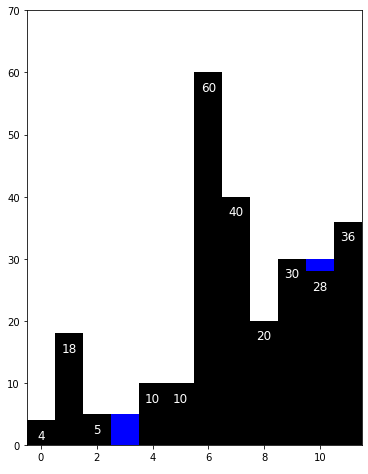

In [69]:
x = [i for i in range(len(height))]
new_height = [4, 18, 5, 5, 10, 10, 60, 40, 20, 30, 30, 36]
# 2. Setup plot
fig, ax = plt.subplots(figsize=(6,8)) #Figure size = Width & Height of the Plot

# 3. Plot data
ax.bar(x, new_height, width=1.0, color="blue")
ax.bar(x, height, width=1.0, color="black")

for i in range(len(x)):
    ax.text(i, height[i]-3, height[i], ha = 'center', c="white", size="large")


ax.set_xlim(-0.5,len(height)-0.5)
ax.set_ylim(0, 70);

### Question 1.34

In [11]:
# %load Q1.34.in
# conjugate continuous
# convergence
# convex conjunction
# congruent concrete
# conjecture concave
# consecutive constant concentric

In [12]:
fin = open('Q1.34.in')
words = [word for word in fin.read().split()]
print(words)

['conjugate', 'continuous', 'convergence', 'convex', 'conjunction', 'congruent', 'concrete', 'conjecture', 'concave', 'consecutive', 'constant', 'concentric']


In [13]:
words.sort()
words = sorted(words, key=lambda x: len(x))

for word in words:
    print(word)

convex
concave
concrete
constant
congruent
conjugate
concentric
conjecture
continuous
conjunction
consecutive
convergence
